## Importing the Libraries

In [58]:
import pandas as pd
import sklearn
import numpy as nm  
import matplotlib.pyplot as mtp

## Data reading

In [59]:
df = pd.read_excel("/Users/user/Downloads/DVA-Project-Data.xlsx")

In [60]:
df.head()

,Name,Jobs,Company,Experience,Certification,Degree
0,Naiara W Jacoboski,Business Intelligence Analyst,Netza,1 yr,Machine Learning,MSc Science
1,Sedat Karsli,Data Analyst,Vitrio,2 mos,Fundamentals Big Data,MSc Data Science
2,Maximilian Pfleger,Data Analytics Intern,Edelman Brasil,10 mos,Power BI,Bs Computer Science
3,Daniel Ankamah,Assistant Civil Engineer,Marques Construtora e Incorporadora Ltda,4 yr,Power BI para Data Science,Bs Technology
4,Amisha Agrawal,Senior Data Analyst,Joyn GmbH,1 yr 3 mos,Learning Django,MSc Data Analyst


## Data Maintaining

### Converting years into days

In [61]:
df['Experience '].unique().tolist()

['1 yr',
 '2 mos',
 '10 mos',
 '4 yr',
 '1 yr 3 mos',
 '2 yr 3 mos',
 '1 yr 2 mos',
 '6 mos',
 '1 yr 1 mo',
 '8 mos',
 '7 mos',
 '1 yr 5 mos',
 '2 yr 10 mos',
 '5 mos',
 '3 yr 10 mos',
 '9 mos',
 '3 mos',
 '3 yrs 9 mos',
 '11 mos',
 '2 yrs 4 mos',
 '1 yr 7 mos',
 '4 mos',
 '1 yr 9 mos',
 '2 yrs 11 mos',
 '2 yrs 1 mo',
 '3 yrs 10 mos',
 '4 yrs 4 mos',
 '6 yrs 5 mos',
 '3 yrs 4 mos',
 '6 yrs 9 mos',
 '7 yrs 9 mos',
 'Full-time',
 '1 yr 11 mos',
 '2 yrs 3 mos',
 '5 yrs 11 mos',
 '2 yrs 7 mos',
 'Internship',
 '5 yrs 1 mo',
 '4 yrs 7 mos',
 '3 yrs',
 '4 yrs 11 mos',
 '2 yrs 2 mos',
 '3 yrs 1 mo',
 '1 yr 6 mos',
 '2 yrs 8 mos',
 '1 yr 4 mos',
 '1 mo',
 '5 yrs 2 mos',
 '3 yrs 6 mos',
 '1 yr 8 mos',
 '3 yrs 7 mos',
 '1 yr 10 mos',
 '4 yrs 8 mos',
 '2 yrs 5 mos',
 '3 yrs 2 mos',
 '4 yrs 6 mos',
 '6 yrs',
 '3 yrs 8 mos',
 '3 yrs 11 mos',
 '4 yrs 1 mo',
 '5 yrs 8 mos',
 '4 yrs 10 mos',
 '9 yrs 8 mos',
 '2 yrs 6 mos',
 '5 yrs 3 mos',
 '4 yrs 9 mos',
 '6 yrs 2 mos',
 '5 yrs 10 mos',
 '4 yrs 5 mos'

In [62]:
def experience_convertor(exp_val):
  value=0
  value_to_change=exp_val
  str_to_list=value_to_change.split()
  #print(str_to_list)
  length_of_lst=len(str_to_list)
  try:
    if length_of_lst==4:
      month=int(float(str_to_list[2]))
      yrs=int(float(str_to_list[0]))
      value=month*30
      value=value+yrs*365                       #write conditon
    if length_of_lst==2:
      yr_month=str_to_list[-1]
      val=int(float(str_to_list[0])  )
      if (yr_month.lower().strip()=='mos' or yr_month.lower().strip()=='mo'):
        value= val*30                     #write conditon
      if (yr_month.lower().strip()=='yr' or yr_month.lower().strip()=='yrs'):
        value=val*365 
  except:
    value= 0                     #write conditon
  return value



df['Experience ']=df['Experience '].apply(experience_convertor)

### Lowering all cases

In [63]:
df = df.apply(lambda x: x.astype(str).str.lower())

### Striping the cases

In [64]:
df = df.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)
df

,Name,Jobs,Company,Experience,Certification,Degree
0,naiara w jacoboski,business intelligence analyst,netza,365,machine learning,msc science
1,sedat karsli,data analyst,vitrio,60,fundamentals big data,msc data science
2,maximilian pfleger,data analytics intern,edelman brasil,300,power bi,bs computer science
3,daniel ankamah,assistant civil engineer,marques construtora e incorporadora ltda,1460,power bi para data science,bs technology
4,amisha agrawal,senior data analyst,joyn gmbh,455,learning django,msc data analyst
...,...,...,...,...,...,...
434,lukas krumholz,data analyst,amer sports corporation,545,it-specialist for application development,phd data science
435,bo li,it business consultant sap bi/bw,swarovski,1000,itil foundation,msc science
436,bidyut saha - data analyst,technical support engineer,sap,730,microsoft sql server 2019 essential training,msc data science
437,sven serr,hardware development engineer,amores robotics,365,big data analytics using spark,bs computer science


In [65]:
x = df['Jobs']
x.value_counts()

data scientist                          38
data analyst                            37
researcher                              13
senior data analyst                     13
student                                 13
                                        ..
communications officer                   1
international consultant                 1
signal processing engineer               1
master's thesis                          1
hardware development engineer intern     1
Name: Jobs, Length: 260, dtype: int64

In [66]:
def check(df, sub_str, stri):
    for i in range(0,len(df.iloc[:,1])):
      if (df.iloc[i,1].find(sub_str)!=-1):
        df.iloc[i,1]=stri
      
          
 
check(df, "data science","data scientist and analyst")
check(df, "data scientist","data scientist and analyst")
check(df, "ai","data scientist and analyst")
check(df, "bi","data scientist and analyst")
check(df, "business intelligence","data scientist and analyst")
check(df, "business","data scientist and analyst")
check(df, "artificial intelligence","data scientist and analyst")
check(df, "research","intern")
check(df, "researcher","intern")
check(df, "student","intern")
check(df, "intern","intern")
check(df, "engineer","others")





for i in range(0,len(df.iloc[:,1])):
      if (df.iloc[i,1].find("analyst")!=-1 and df.iloc[i,1].find("data analyst")==-1):
        df.iloc[i,1]='data scientist and analyst'

for i in range(0,len(df.iloc[:,1])):
      if (df.iloc[i,1]!="data scientist and analyst"  and df.iloc[i,1]!="researhcer" and df.iloc[i,1]!="intern"):
        df.iloc[i,1]='others'


check(df,"data analyst","data scientist and analyst")
check(df,"data analystics","data scientist and analyst")

In [67]:
x = df['Jobs']
x.value_counts()

others                        196
data scientist and analyst    127
intern                        116
Name: Jobs, dtype: int64

In [68]:
def certificates(df, sub_str, stri):
    for i in range(0,len(df.iloc[:,4])):
      if (df.iloc[i,4].find(sub_str)!=-1):
        df.iloc[i,4]=stri
      
          
      
       
 
certificates(df, "machine learning","machine learning")
certificates(df, "power bi","power bi")
certificates(df, "neural networks","neural networks")
certificates(df, "data science","data science")
certificates(df, "data scientist","data science")
certificates(df, "scrum","scrum master")
certificates(df, "microsoft","microsoft certified")
certificates(df, "data analytics","data analytics")
certificates(df, "python","certified in python")
certificates(df, "R","Certified in R")






for i in range(0,len(df.iloc[:,1])):
      if (df.iloc[i,1].find("analyst")!=-1 and df.iloc[i,1].find("data analyst")==-1):
        df.iloc[i,1]='data scientist'      
        
for i in range(0,len(df.iloc[:,4])):
      if (df.iloc[i,4]!="machine learning" and df.iloc[i,4]!="power bi" and df.iloc[i,4]!="neural networks" and df.iloc[i,4]!="data science" and df.iloc[i,4]!="scrum master" and df.iloc[i,4]!="microsoft certified" and df.iloc[i,4]!="data analytics" and df.iloc[i,4]!="certified in python" and df.iloc[i,4]!="Certified in R" and df.iloc[i,4]!="Learning django"):
        df.iloc[i,4]='others'        


certificates(df,"data analyst","data analyst")

In [69]:
df['Certification']

0         machine learning
1                   others
2                 power bi
3                 power bi
4                   others
              ...         
434                 others
435                 others
436    microsoft certified
437         data analytics
438                 others
Name: Certification, Length: 439, dtype: object

In [70]:
x = df['Certification']
x.value_counts()

others                 272
data science            54
machine learning        34
certified in python     25
neural networks         16
data analytics          11
scrum master            10
microsoft certified      9
power bi                 8
Name: Certification, dtype: int64

In [71]:
df

,Name,Jobs,Company,Experience,Certification,Degree
0,naiara w jacoboski,data scientist,netza,365,machine learning,msc science
1,sedat karsli,others,vitrio,60,others,msc data science
2,maximilian pfleger,intern,edelman brasil,300,power bi,bs computer science
3,daniel ankamah,others,marques construtora e incorporadora ltda,1460,power bi,bs technology
4,amisha agrawal,others,joyn gmbh,455,others,msc data analyst
...,...,...,...,...,...,...
434,lukas krumholz,others,amer sports corporation,545,others,phd data science
435,bo li,data scientist,swarovski,1000,others,msc science
436,bidyut saha - data analyst,others,sap,730,microsoft certified,msc data science
437,sven serr,others,amores robotics,365,data analytics,bs computer science


In [72]:

df1=pd.DataFrame(df,columns=['Name','Jobs','Company','Experience ','Certification','Degree'])
df1


,Name,Jobs,Company,Experience,Certification,Degree
0,naiara w jacoboski,data scientist,netza,365,machine learning,msc science
1,sedat karsli,others,vitrio,60,others,msc data science
2,maximilian pfleger,intern,edelman brasil,300,power bi,bs computer science
3,daniel ankamah,others,marques construtora e incorporadora ltda,1460,power bi,bs technology
4,amisha agrawal,others,joyn gmbh,455,others,msc data analyst
...,...,...,...,...,...,...
434,lukas krumholz,others,amer sports corporation,545,others,phd data science
435,bo li,data scientist,swarovski,1000,others,msc science
436,bidyut saha - data analyst,others,sap,730,microsoft certified,msc data science
437,sven serr,others,amores robotics,365,data analytics,bs computer science


In [73]:
df1.to_csv('new_data.csv')

### label encoding 

In [74]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
df['Jobs']= label_encoder.fit_transform(df['Jobs']) 
df['Company']= label_encoder.fit_transform(df['Company'])
df['Certification']= label_encoder.fit_transform(df['Certification'])
df['Degree']= label_encoder.fit_transform(df['Degree']) 

df.head()

,Name,Jobs,Company,Experience,Certification,Degree
0,naiara w jacoboski,0,225,365,3,7
1,sedat karsli,2,340,60,6,6
2,maximilian pfleger,1,93,300,7,2
3,daniel ankamah,2,199,1460,7,4
4,amisha agrawal,2,168,455,6,5


In [75]:
df[df['Jobs']==1]

,Name,Jobs,Company,Experience,Certification,Degree
2,maximilian pfleger,1,93,300,7,2
8,kieu do,1,276,395,6,6
15,ahmed mzid,1,18,270,6,9
17,annalena erhard,1,213,90,3,6
18,claire beswick,1,275,90,6,2
...,...,...,...,...,...,...
420,felicia p.,1,107,1395,6,9
426,henning rolfes,1,204,1155,6,7
427,javier arbizu,1,126,1125,6,6
428,jana fender,1,331,545,6,2


In [76]:
'''#Under sampling
intern = df.loc[df['Jobs'] == 1]
data_scientist=df.loc[df['Jobs'] == 0]
others=df.loc[df['Jobs'] == 2][:len(data_scientist)]
 

normal_distributed_df = pd.concat([intern, data_scientist,others])

# Shuffle dataframe rows
df1 = normal_distributed_df.sample(frac=1, random_state=42)
df1 = df1.reset_index(drop=True)
df1.head()'''

"#Under sampling\nintern = df.loc[df['Jobs'] == 1]\ndata_scientist=df.loc[df['Jobs'] == 0]\nothers=df.loc[df['Jobs'] == 2][:len(data_scientist)]\n \n\nnormal_distributed_df = pd.concat([intern, data_scientist,others])\n\n# Shuffle dataframe rows\ndf1 = normal_distributed_df.sample(frac=1, random_state=42)\ndf1 = df1.reset_index(drop=True)\ndf1.head()"

In [77]:
#x = df1['Jobs']
#x.value_counts()

# SVM Classifier-with kernal techniques

In [78]:
X = df.iloc[:,[4,5]].values  
y= df.iloc[:,1].values 

In [113]:
from sklearn import metrics

In [ ]:
PlotPolly(p, X, y, 'highway-mpg')

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, stratify = y, random_state= 60)

In [80]:
'''from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)''''''

SyntaxError: EOF while scanning triple-quoted string literal (1750199914.py, line 3)

from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

In [81]:
#y_pred = svclassifier.predict(X_test)

In [82]:
'''from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))'''

'from sklearn.metrics import classification_report, confusion_matrix\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test, y_pred))'

In [83]:
'''from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["data scientist and analyst","intern","others"])'''

'from sklearn import metrics\n\nconfusion_matrix = metrics.confusion_matrix(y_test, y_pred)\n\ncm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["data scientist and analyst","intern","others"])'

In [84]:
#cm_display.plot()
#mtp.show()

## Sigmoid

In [85]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [87]:
y_pred = svclassifier.predict(X_test)
y_pred

array([2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0])

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names= ["data scientist and analyst","intern","others"]))

[[ 8  2  3]
 [ 3  3  5]
 [10  3  7]]
                            precision    recall  f1-score   support

data scientist and analyst       0.38      0.62      0.47        13
                    intern       0.38      0.27      0.32        11
                    others       0.47      0.35      0.40        20

                  accuracy                           0.41        44
                 macro avg       0.41      0.41      0.40        44
              weighted avg       0.42      0.41      0.40        44



In [28]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = ["data scientist and analyst","intern","others"])

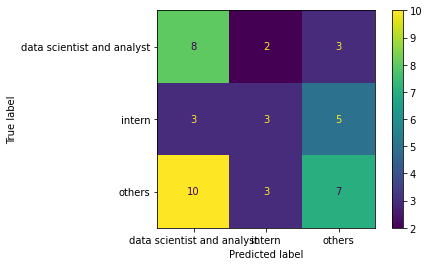

In [29]:
cm_display.plot()
mtp.show()

### Gaussian surface

In [30]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [31]:
y_pred = svclassifier.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names= ["data scientist and analyst","intern","others"]))

[[ 0  0 13]
 [ 0  0 11]
 [ 0  0 20]]
                            precision    recall  f1-score   support

data scientist and analyst       0.00      0.00      0.00        13
                    intern       0.00      0.00      0.00        11
                    others       0.45      1.00      0.62        20

                  accuracy                           0.45        44
                 macro avg       0.15      0.33      0.21        44
              weighted avg       0.21      0.45      0.28        44



/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = ["data scientist and analyst","intern","others"])

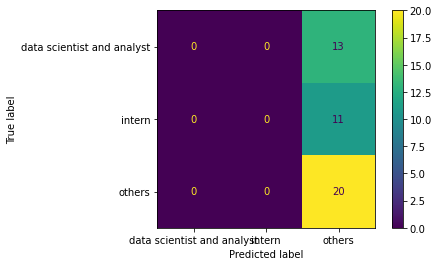

In [34]:
cm_display.plot()
mtp.show()

In [35]:
print(X_test.shape)
print(y_pred.shape)

(44, 2)
(44,)


No handles with labels found to put in legend.


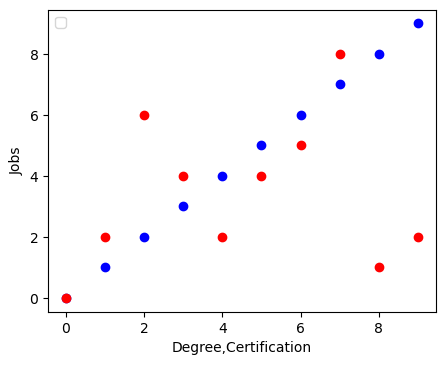

In [126]:
def plotGraph(y_test,y_pred):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    mtp.scatter(range(len(y_test)), y_test, color='blue')
    mtp.scatter(range(len(y_pred)), y_pred, color='red')
    mtp.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':50})
    mtp.ylabel('Jobs')
    mtp.xlabel('Degree,Certification')
    mtp.legend()
    mtp.show()
    mtp.show()
    return

plotGraph(y_test, y_pred)

# Data science related Jobs / no related Jobs classification

In [127]:
Dataframe=pd.DataFrame(df1,columns=['Name','Jobs','Company','Experience ','Certification','Degree'])
Dataframe

,Name,Jobs,Company,Experience,Certification,Degree
0,naiara w jacoboski,data scientist,netza,365,machine learning,msc science
1,sedat karsli,others,vitrio,60,others,msc data science
2,maximilian pfleger,intern,edelman brasil,300,power bi,bs computer science
3,daniel ankamah,others,marques construtora e incorporadora ltda,1460,power bi,bs technology
4,amisha agrawal,others,joyn gmbh,455,others,msc data analyst
...,...,...,...,...,...,...
434,lukas krumholz,others,amer sports corporation,545,others,phd data science
435,bo li,data scientist,swarovski,1000,others,msc science
436,bidyut saha - data analyst,others,sap,730,microsoft certified,msc data science
437,sven serr,others,amores robotics,365,data analytics,bs computer science


In [128]:
def Jobcheck(Dataframe, sub_str, stri):
    for i in range(0,len(Dataframe.iloc[:,1])):
      if (Dataframe.iloc[i,1].find(sub_str)!=-1):
        Dataframe.iloc[i,1]=stri
      
          
Jobcheck(Dataframe, "data scientist","Jobs")
Jobcheck(Dataframe, "intern","Jobs")


for i in range(0,len(Dataframe.iloc[:,1])):
      if (Dataframe.iloc[i,1]!="Jobs"):
        Dataframe.iloc[i,1]='No Job' 

In [129]:
Dataframe

,Name,Jobs,Company,Experience,Certification,Degree
0,naiara w jacoboski,Jobs,netza,365,machine learning,msc science
1,sedat karsli,No Job,vitrio,60,others,msc data science
2,maximilian pfleger,Jobs,edelman brasil,300,power bi,bs computer science
3,daniel ankamah,No Job,marques construtora e incorporadora ltda,1460,power bi,bs technology
4,amisha agrawal,No Job,joyn gmbh,455,others,msc data analyst
...,...,...,...,...,...,...
434,lukas krumholz,No Job,amer sports corporation,545,others,phd data science
435,bo li,Jobs,swarovski,1000,others,msc science
436,bidyut saha - data analyst,No Job,sap,730,microsoft certified,msc data science
437,sven serr,No Job,amores robotics,365,data analytics,bs computer science


In [130]:
def Certcheck(Dataframe, sub_str, stri):
    for i in range(0,len(Dataframe.iloc[:,4])):
      if (Dataframe.iloc[i,4].find(sub_str)!=-1):
        Dataframe.iloc[i,4]=stri
      
          
Certcheck(Dataframe, "machine learning","Data related Jobs")
Certcheck(Dataframe, "power bi","Data related Jobs")
Certcheck(Dataframe, "microsoft certified","Data related Jobs")
Certcheck(Dataframe, "data analytics","Data related Jobs")
Certcheck(Dataframe, "neural network","Data related Jobs")
Certcheck(Dataframe, "data science","Data related Jobs")
Certcheck(Dataframe, "scrum master","Data related Jobs")
Certcheck(Dataframe, "certified in python","Data related Jobs")
Certcheck(Dataframe, "certified in r","Data related Jobs")
Certcheck(Dataframe, "learning django","Data related Jobs")


for i in range(0,len(Dataframe.iloc[:,4])):
      if (Dataframe.iloc[i,4]!="Data related Jobs"):
        Dataframe.iloc[i,4]= "others"

In [131]:
Dataframe
Dataframe.to_csv('job_data.csv')

In [132]:
x = Dataframe['Jobs']
x.value_counts()

Jobs      243
No Job    196
Name: Jobs, dtype: int64

### label encoding 

In [133]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
Dataframe['Jobs']= label_encoder.fit_transform(Dataframe['Jobs']) 
Dataframe['Company']= label_encoder.fit_transform(Dataframe['Company'])
Dataframe['Certification']= label_encoder.fit_transform(Dataframe['Certification'])
Dataframe['Degree']= label_encoder.fit_transform(Dataframe['Degree']) 

Dataframe.head()

,Name,Jobs,Company,Experience,Certification,Degree
0,naiara w jacoboski,0,225,365,0,7
1,sedat karsli,1,340,60,1,6
2,maximilian pfleger,0,93,300,0,2
3,daniel ankamah,1,199,1460,0,4
4,amisha agrawal,1,168,455,1,5


## SVM-Kernal Classifier

In [134]:
X = Dataframe.iloc[:,[4]].values  
y= Dataframe.iloc[:,1].values 

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state= 60)

### Polynomial

In [46]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [47]:
y_pred = svclassifier.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27  0]
 [17  0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        27
           1       0.00      0.00      0.00        17

    accuracy                           0.61        44
   macro avg       0.31      0.50      0.38        44
weighted avg       0.38      0.61      0.47        44



/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sigmoid

In [135]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [50]:
y_pred = svclassifier.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names= ["Data Jobs","others"]))

[[27  0]
 [17  0]]
              precision    recall  f1-score   support

   Data Jobs       0.61      1.00      0.76        27
      others       0.00      0.00      0.00        17

    accuracy                           0.61        44
   macro avg       0.31      0.50      0.38        44
weighted avg       0.38      0.61      0.47        44



/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = ["data jobs","others"])

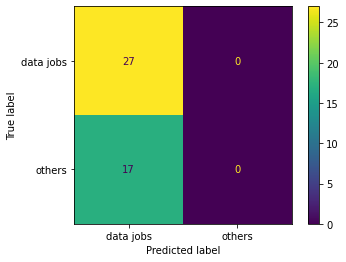

In [53]:
cm_display.plot()
mtp.show()

### Gaussian Surface

In [54]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [55]:
y_pred = svclassifier.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names= ["Jobs","No Jobs"]))

[[27  0]
 [17  0]]
              precision    recall  f1-score   support

        Jobs       0.61      1.00      0.76        27
     No Jobs       0.00      0.00      0.00        17

    accuracy                           0.61        44
   macro avg       0.31      0.50      0.38        44
weighted avg       0.38      0.61      0.47        44



/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No handles with labels found to put in legend.


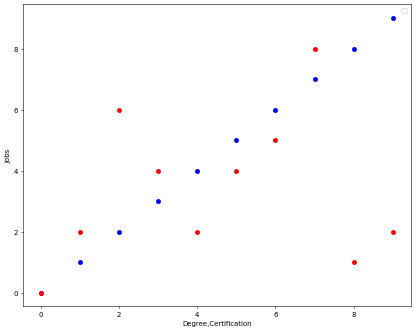

In [138]:
def plotGraph(y_test,y_pred):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    mtp.scatter(range(len(y_test)), y_test, color='blue')
    mtp.scatter(range(len(y_pred)), y_pred, color='red')
    mtp.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    mtp.ylabel('Jobs')
    mtp.xlabel('Degree,Certification')
    mtp.legend()
    mtp.show()
    mtp.show()
    return

plotGraph(y_test, y_pred)